In [1]:
#Working on applying Prophet to our datasets

#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import pickle
import matplotlib.ticker as ticker






In [2]:
#Read in the data

mr_df = pd.read_csv('../Usefull Dataframes/Mortgage rates/MORTGAGE30US.csv')






display(mr_df.tail())

#Analyze the data





,DATE,MORTGAGE30US
2753,1/4/2024,6.62
2754,1/11/2024,6.66
2755,1/18/2024,6.60
2756,1/25/2024,6.69
2757,2/1/2024,6.63


In [3]:
#Transform/clean the data, if necessary

#rename the 'DATE' column to 'Date' to match the other dataframes
mr_df.rename(columns={'DATE':'Date'}, inplace=True)

#change the 'Date' column to datetime

mr_df['Date'] = pd.to_datetime(mr_df['Date'])

#Interpolate the rows to have monthly entries on the first of each month instead of weekly columns
mr_df = mr_df.resample('MS', on='Date').first().reset_index()

mr_df = mr_df.interpolate(method='linear')

#Change the 'MORTGAGE30US' column to '30-Year Mortgage Interest Rate'
mr_df.rename(columns={'MORTGAGE30US':'30-Year Mortgage Interest Rate'}, inplace=True)

#Make a copy of the original dataframe
mr_df_source = mr_df.copy()
display(mr_df_source.tail())

#Remove the last row of the dataframe to avoid the 'future' data
mr_df = mr_df.iloc[:-1]

mr_df 







,Date,30-Year Mortgage Interest Rate
630,2023-10-01,7.49
631,2023-11-01,7.76
632,2023-12-01,7.03
633,2024-01-01,6.62
634,2024-02-01,6.63


,Date,30-Year Mortgage Interest Rate
0,1971-04-01,7.33
1,1971-05-01,7.38
2,1971-06-01,7.52
3,1971-07-01,7.54
4,1971-08-01,7.66
...,...,...
629,2023-09-01,7.12
630,2023-10-01,7.49
631,2023-11-01,7.76
632,2023-12-01,7.03


array([<Axes: >, <Axes: >], dtype=object)

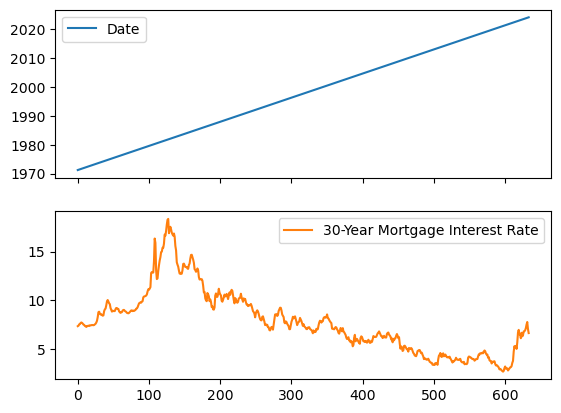

In [4]:
#Plot Dataframes
mr_df.plot(subplots=True)

In [5]:
#Prepare the data for Prophet
m = Prophet()
m



display(mr_df)

prepped_mr_df = mr_df.rename(columns={'Date': 'ds', '30-Year Mortgage Interest Rate':'y'})

display(prepped_mr_df)


#Train the model
m.fit(prepped_mr_df)



,Date,30-Year Mortgage Interest Rate
0,1971-04-01,7.33
1,1971-05-01,7.38
2,1971-06-01,7.52
3,1971-07-01,7.54
4,1971-08-01,7.66
...,...,...
629,2023-09-01,7.12
630,2023-10-01,7.49
631,2023-11-01,7.76
632,2023-12-01,7.03


,ds,y
0,1971-04-01,7.33
1,1971-05-01,7.38
2,1971-06-01,7.52
3,1971-07-01,7.54
4,1971-08-01,7.66
...,...,...
629,2023-09-01,7.12
630,2023-10-01,7.49
631,2023-11-01,7.76
632,2023-12-01,7.03


21:09:44 - cmdstanpy - INFO - Chain [1] start processing
21:09:44 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#Make predictions

future_mr_df = m.make_future_dataframe(periods=36, freq="MS")
future_mr_df.tail(37)


,ds
633,2024-01-01
634,2024-02-01
635,2024-03-01
636,2024-04-01
637,2024-05-01
638,2024-06-01
639,2024-07-01
640,2024-08-01
641,2024-09-01
642,2024-10-01


In [12]:
#Make the predictions
future_mr_df = m.predict(future_mr_df)
future_mr_df.tail(50)





,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
620,2022-12-01,4.477846,3.107331,5.826037,4.477846,4.477846,-0.014699,-0.014699,-0.014699,-0.014699,-0.014699,-0.014699,0.0,0.0,0.0,4.463147
621,2023-01-01,4.481350,3.037895,5.882904,4.481350,4.481350,-0.032557,-0.032557,-0.032557,-0.032557,-0.032557,-0.032557,0.0,0.0,0.0,4.448793
622,2023-02-01,4.484854,2.943295,5.632264,4.484854,4.484854,-0.159693,-0.159693,-0.159693,-0.159693,-0.159693,-0.159693,0.0,0.0,0.0,4.325161
623,2023-03-01,4.488019,3.087542,5.752004,4.488019,4.488019,-0.077846,-0.077846,-0.077846,-0.077846,-0.077846,-0.077846,0.0,0.0,0.0,4.410172
624,2023-04-01,4.491523,3.106675,5.849205,4.491523,4.491523,-0.019719,-0.019719,-0.019719,-0.019719,-0.019719,-0.019719,0.0,0.0,0.0,4.471804
625,2023-05-01,4.494913,3.135356,6.095789,4.494913,4.494913,0.064574,0.064574,0.064574,0.064574,0.064574,0.064574,0.0,0.0,0.0,4.559488
626,2023-06-01,4.498417,3.264152,5.967447,4.498417,4.498417,0.079296,0.079296,0.079296,0.079296,0.079296,0.079296,0.0,0.0,0.0,4.577714
627,2023-07-01,4.501808,3.280105,6.014998,4.501808,4.501808,0.096131,0.096131,0.096131,0.096131,0.096131,0.096131,0.0,0.0,0.0,4.597940
628,2023-08-01,4.505312,3.139322,5.867294,4.505312,4.505312,0.088486,0.088486,0.088486,0.088486,0.088486,0.088486,0.0,0.0,0.0,4.593798
629,2023-09-01,4.508816,3.140001,5.934175,4.508816,4.508816,0.031954,0.031954,0.031954,0.031954,0.031954,0.031954,0.0,0.0,0.0,4.540770


/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


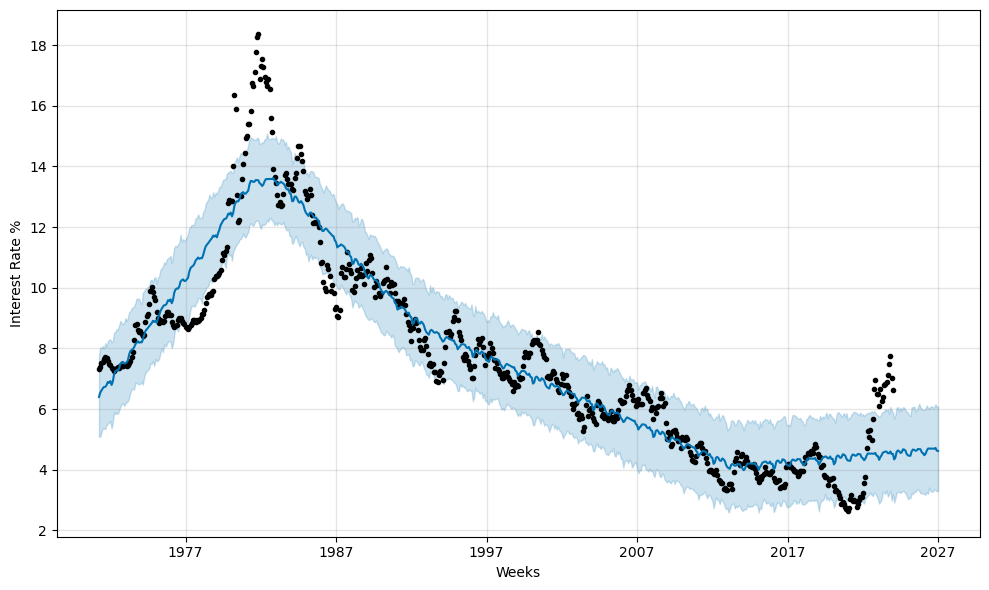

In [8]:
#Plot the predictions
fig1 = m.plot(future_mr_df, xlabel='Weeks', ylabel='Interest Rate %')

/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

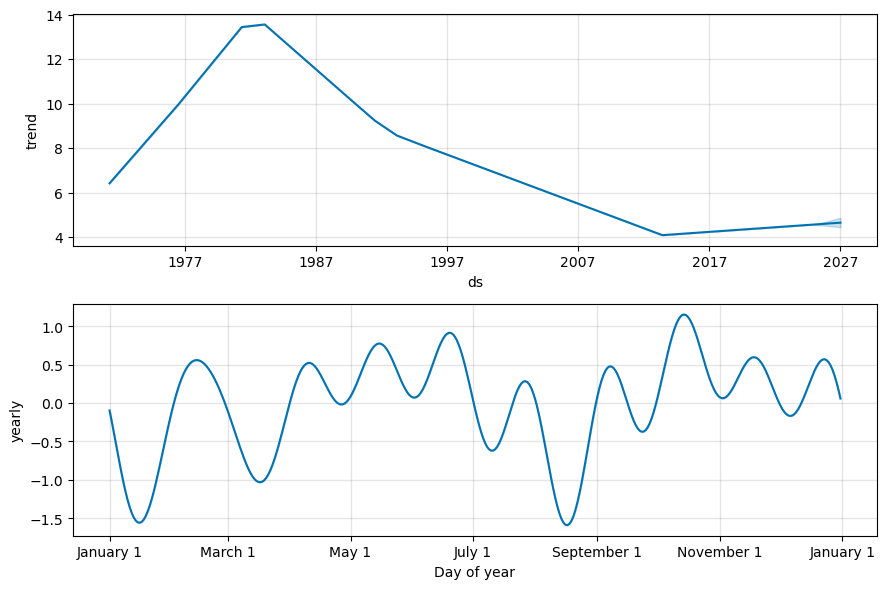

In [9]:
#Evaluate the model

fig2 = m.plot_components(future_mr_df)




In [10]:
future_mr_df 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1971-04-01,6.416402,5.091373,7.774772,6.416402,6.416402,-0.019719,-0.019719,-0.019719,-0.019719,-0.019719,-0.019719,0.0,0.0,0.0,6.396683
1,1971-05-01,6.471742,5.085415,8.034676,6.471742,6.471742,0.064574,0.064574,0.064574,0.064574,0.064574,0.064574,0.0,0.0,0.0,6.536316
2,1971-06-01,6.528926,5.234662,8.008435,6.528926,6.528926,0.079296,0.079296,0.079296,0.079296,0.079296,0.079296,0.0,0.0,0.0,6.608222
3,1971-07-01,6.584265,5.359966,8.078076,6.584265,6.584265,0.096131,0.096131,0.096131,0.096131,0.096131,0.096131,0.0,0.0,0.0,6.680396
4,1971-08-01,6.641449,5.356545,7.998595,6.641449,6.641449,0.088486,0.088486,0.088486,0.088486,0.088486,0.088486,0.0,0.0,0.0,6.729935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2026-09-01,4.632698,3.284575,6.049687,4.460181,4.817101,0.062280,0.062280,0.062280,0.062280,0.062280,0.062280,0.0,0.0,0.0,4.694977
666,2026-10-01,4.636089,3.350247,6.057773,4.454166,4.829735,0.054243,0.054243,0.054243,0.054243,0.054243,0.054243,0.0,0.0,0.0,4.690332
667,2026-11-01,4.639593,3.329595,6.156096,4.449637,4.843841,0.077875,0.077875,0.077875,0.077875,0.077875,0.077875,0.0,0.0,0.0,4.717467
668,2026-12-01,4.642983,3.282575,6.055022,4.445293,4.855397,-0.014699,-0.014699,-0.014699,-0.014699,-0.014699,-0.014699,0.0,0.0,0.0,4.628285


In [11]:
# Evaluate the Model

# Compare the yhat data in index 21 to the last row of the original dataframe
last_value_original = mr_df_source.iloc[-1]['30-Year Mortgage Interest Rate']
yhat_value = future_mr_df.iloc[634]['yhat']

print(f'Last value in original dataframe: {last_value_original}')
print(f'Predicted value: {yhat_value}')

Last value in original dataframe: 6.63
Predicted value: 4.338785619346242
